In [2]:
import pandas as pd
from parallel_user_signup_test import parallel_user_signup_test
from pathlib import Path

DATA_DIR = Path().resolve() / 'data'

tries_per_amount = 20
min_concurrent_signups = 1
max_concurrent_signups = 10

df = pd.DataFrame()


for amount in range(min_concurrent_signups, max_concurrent_signups + 1):
    print(f"Amount {amount}")
    for t in range(tries_per_amount):
        print(f"  Try {t+1}/{tries_per_amount}")
        result = parallel_user_signup_test(amount, duration_seconds=0)

        create_thread_count = result['create_thread_count']
        create_success_count = result['create_success_count']
        create_failure_count = result['create_failure_count']
        create_duration = result['create_duration']
        
        create_failure_rate = create_failure_count / create_thread_count if create_failure_count > 0 else 0
        mean_create_duration = create_duration / create_thread_count if create_thread_count > 0 else 0
        
        delete_thread_count = result['delete_thread_count']
        delete_success_count = result['delete_success_count']
        delete_failure_count = result['delete_failure_count']
        delete_duration = result['delete_duration']
        
        delete_failure_rate = delete_failure_count / delete_thread_count if delete_failure_count > 0 else 0
        mean_delete_duration = delete_duration / delete_thread_count if delete_thread_count > 0 else 0
        
        
        
        df = pd.concat([df, pd.DataFrame({
            'amount': [amount],
            'create_thread_count': [create_thread_count],
            'create_success_count': [create_success_count],
            'create_failure_count': [create_failure_count],
            'create_duration': [create_duration],
            'create_failure_rate': [create_failure_rate],
            'mean_create_duration': [mean_create_duration],
            'delete_thread_count': [delete_thread_count],
            'delete_success_count': [delete_success_count],
            'delete_failure_count': [delete_failure_count],
            'delete_duration': [delete_duration],
            'delete_failure_rate': [delete_failure_rate],
            'mean_delete_duration': [mean_delete_duration],
        })], ignore_index=True)
        
df.to_csv(DATA_DIR / 'parallel_user_signup_test_results.csv', index=False)

Amount 1
  Try 1/20
  Try 2/20
  Try 3/20
  Try 4/20
  Try 5/20
  Try 6/20
  Try 7/20
  Try 8/20
  Try 9/20
  Try 10/20
  Try 11/20
  Try 12/20
  Try 13/20
  Try 14/20
  Try 15/20
  Try 16/20
  Try 17/20
  Try 18/20
  Try 19/20
  Try 20/20
Amount 2
  Try 1/20
  Try 2/20
  Try 3/20
  Try 4/20
  Try 5/20
  Try 6/20
  Try 7/20
  Try 8/20
  Try 9/20
  Try 10/20
  Try 11/20
  Try 12/20
  Try 13/20
  Try 14/20
  Try 15/20
  Try 16/20
  Try 17/20
  Try 18/20
  Try 19/20
  Try 20/20
Amount 3
  Try 1/20
  Try 2/20
  Try 3/20
  Try 4/20
  Try 5/20
  Try 6/20
  Try 7/20
  Try 8/20
  Try 9/20
  Try 10/20
  Try 11/20
  Try 12/20
  Try 13/20
  Try 14/20
  Try 15/20
  Try 16/20
  Try 17/20
  Try 18/20
  Try 19/20
  Try 20/20
Amount 4
  Try 1/20
  Try 2/20
  Try 3/20
  Try 4/20
  Try 5/20
  Try 6/20
  Try 7/20
  Try 8/20
  Try 9/20
  Try 10/20
  Try 11/20
  Try 12/20
  Try 13/20
  Try 14/20
  Try 15/20
  Try 16/20
  Try 17/20
  Try 18/20
  Try 19/20
  Try 20/20
Amount 5
  Try 1/20
  Try 2/20
  Try 3/2

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

DATA_DIR = Path().resolve() / 'data'
df = pd.read_csv(DATA_DIR / 'parallel_user_signup_test_results.csv')

create_failure_rates = {}
delete_failure_rates = {}

for amount in range(min_concurrent_signups, max_concurrent_signups + 1):
    total_create_tries = df[df['amount'] == amount]['create_thread_count'].sum()
    total_create_failures = df[df['amount'] == amount]['create_failure_count'].sum()
    create_failure_rates[amount] = total_create_failures / total_create_tries if total_create_tries > 0 else 0

    total_delete_tries = df[df['amount'] == amount]['delete_thread_count'].sum()
    total_delete_failures = df[df['amount'] == amount]['delete_failure_count'].sum()
    delete_failure_rates[amount] = total_delete_failures / total_delete_tries if total_delete_tries > 0 else 0

In [4]:
if any(rate > 0 for rate in create_failure_rates.values()):
    plt.figure(figsize=(16, 9))
    
    sns.barplot(x=list(create_failure_rates.keys()), y=list(create_failure_rates.values()))
    plt.title('User Signup Creation Failure Rate by Amount')
    plt.xlabel('Number of Concurrent Signups')
    plt.ylabel('Creation Failure Rate')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No creation failures recorded.")

No creation failures recorded.


In [5]:
if any(rate > 0 for rate in delete_failure_rates.values()):
    plt.figure(figsize=(16, 9))
    
    sns.barplot(x=list(delete_failure_rates.keys()), y=list(delete_failure_rates.values()))
    plt.title('User Signup Deletion Failure Rate by Amount')
    plt.xlabel('Number of Concurrent Signups')
    plt.ylabel('Deletion Failure Rate')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No deletion failures recorded.")

No deletion failures recorded.


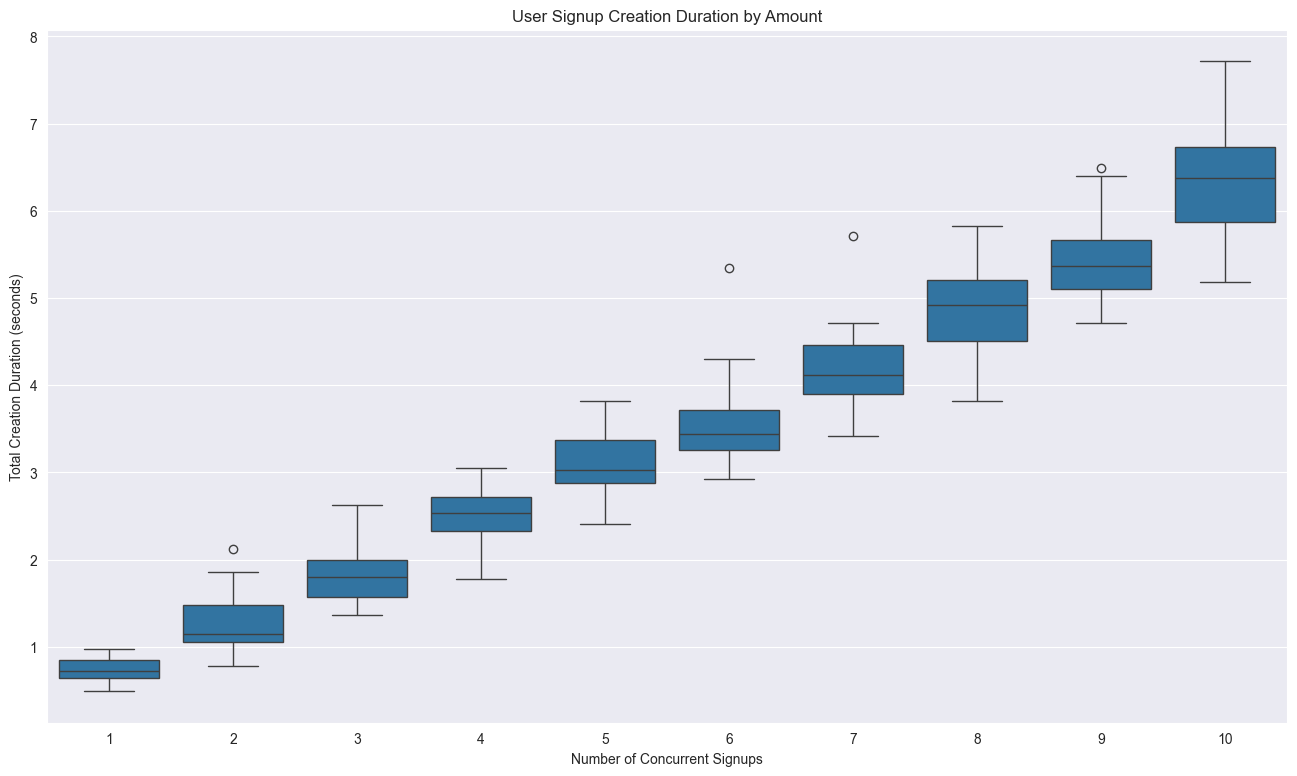

In [6]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=df, x='amount', y='create_duration')
plt.title('User Signup Creation Duration by Amount')
plt.xlabel('Number of Concurrent Signups')
plt.ylabel('Total Creation Duration (seconds)')
plt.show()

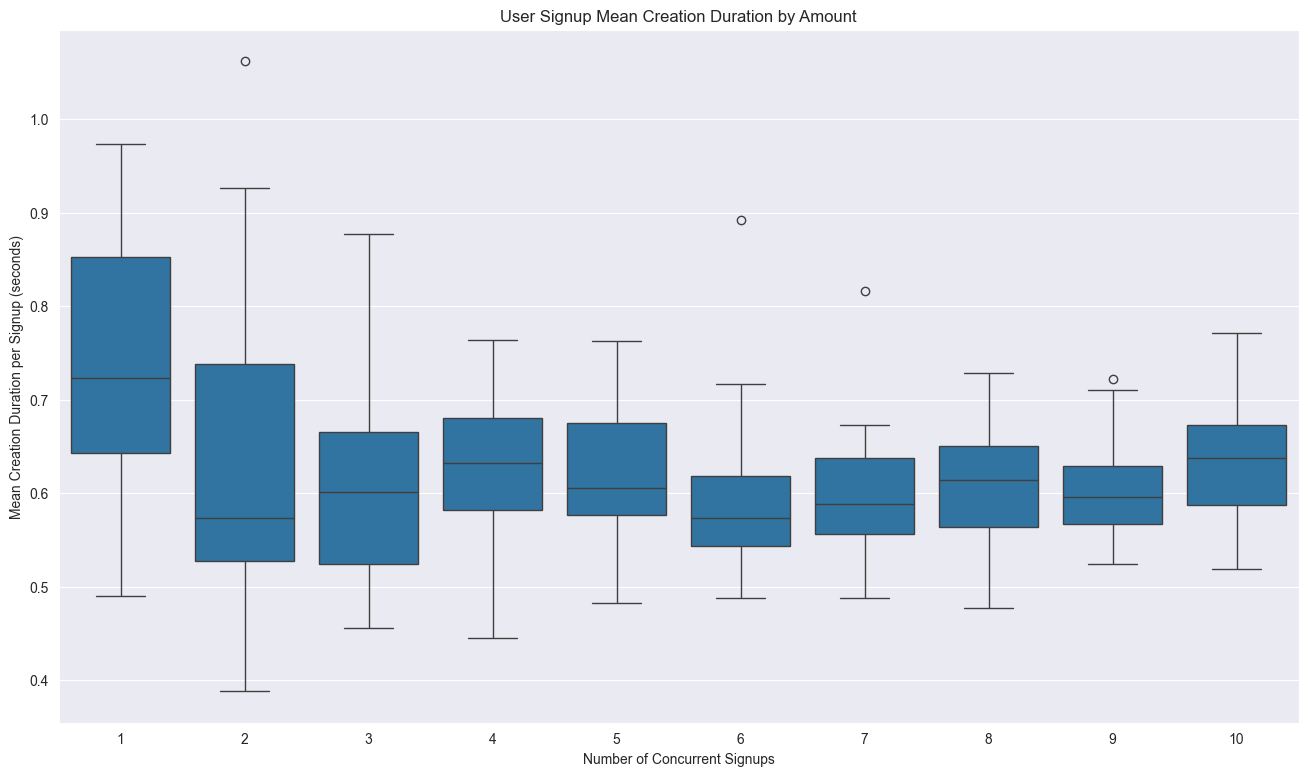

In [7]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=df, x='amount', y='mean_create_duration')
plt.title('User Signup Mean Creation Duration by Amount')
plt.xlabel('Number of Concurrent Signups')
plt.ylabel('Mean Creation Duration per Signup (seconds)')
plt.show()

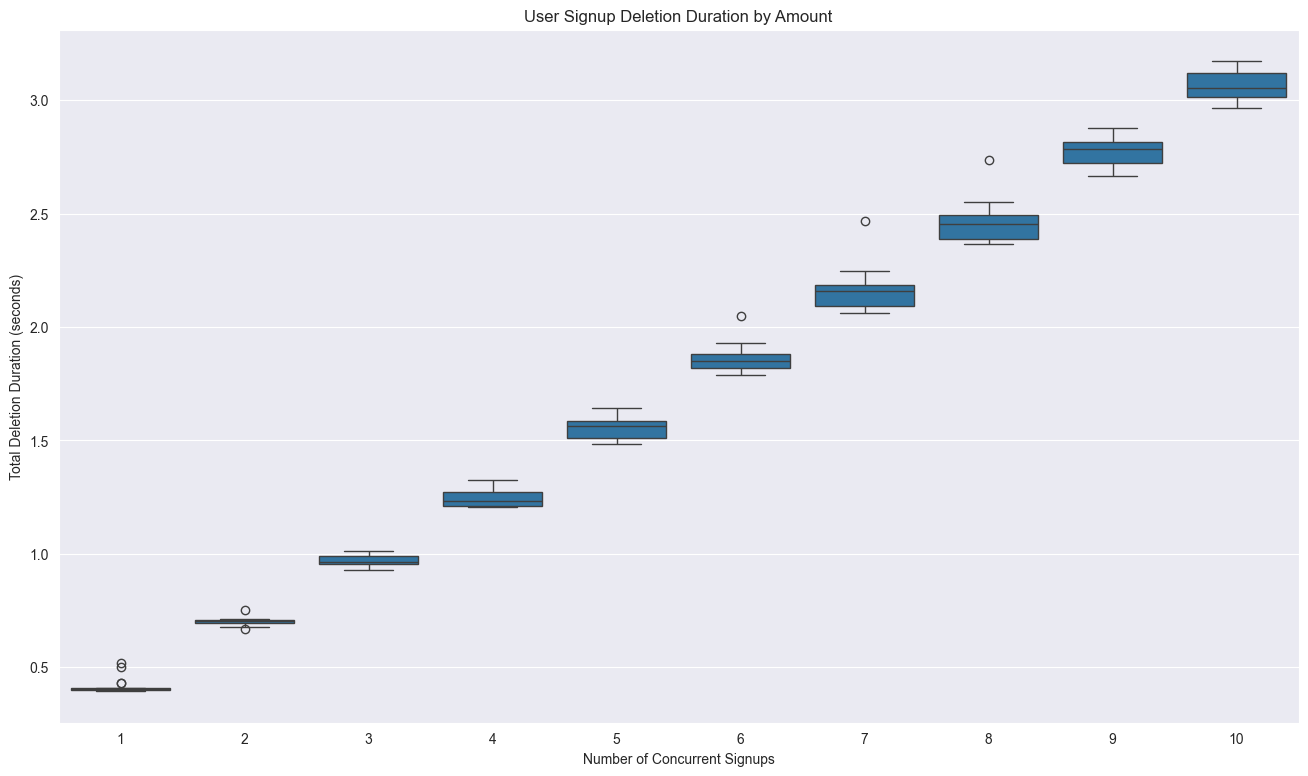

In [8]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=df, x='amount', y='delete_duration')
plt.title('User Signup Deletion Duration by Amount')
plt.xlabel('Number of Concurrent Signups')
plt.ylabel('Total Deletion Duration (seconds)')
plt.show()

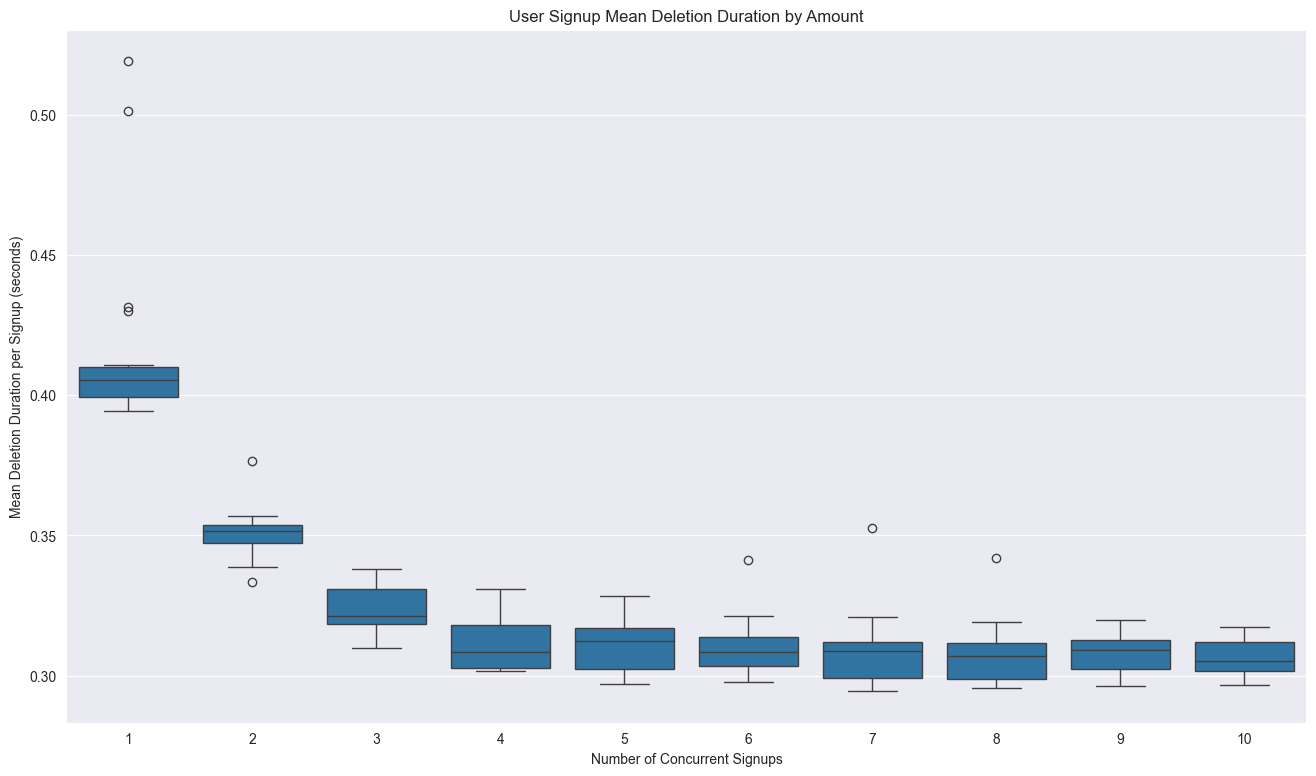

In [9]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=df, x='amount', y='mean_delete_duration')
plt.title('User Signup Mean Deletion Duration by Amount')
plt.xlabel('Number of Concurrent Signups')
plt.ylabel('Mean Deletion Duration per Signup (seconds)')
plt.show()